In [1]:
'''ONLY RUN THIS CELL ONCE OR THE PATH WILL CHANGE AND YOU WILL HAVE TO RESTART AND RUN ALL'''
import os
os.path.abspath(os.curdir)
os.chdir("..")
REPO_PATH = os.path.abspath(os.curdir)
FIGURE_PATH = REPO_PATH + '/reports/figures/'
print(FIGURE_PATH)

c:\Scripts\mit808-2022-project-significant-outliers-1/reports/figures/


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from functions import *

# 1. DETAIL ANALYSIS
## 1.1. Weather Dataset
See CM_weather_eda.ipynb

## 1.2 Sirex inspection samples

In [3]:
sirexData = read_from_drive('https://drive.google.com/file/d/1tTJMB0Pocj6VqVipbhCGdvZPAX7CY4lX/view?usp=sharing')
sirexData.head()

,Year,Species,Sirex_Presence,DataCleaning
0,2012,P PAT,No Sirex,Inference from same site numbers and compartments
1,2012,P PAT,No Sirex,Inference from same site numbers and compartments
2,2012,P PAT,No Sirex,-
3,2012,P PAT,No Sirex,Inference from same site numbers and compartments
4,2012,P PAT,No Sirex,-


In [4]:
sirexPerYear = sirexData.groupby(['Year']).size()
print('Sirex per year')
print(sirexPerYear)

print("Average count for Sirex and No Sirex per Year:",sum(sirexPerYear)/len(sirexPerYear))
print("Total count for Sirex and No Sirex:",len(sirexData))

Sirex per year
Year
2012    392
2013    436
2014    480
2015    474
2016    485
2017    477
2018    510
2019    526
dtype: int64
Average count for Sirex and No Sirex per Year: 472.5
Total count for Sirex and No Sirex: 3780


In [5]:
sirexPresence = sirexData[sirexData['Sirex_Presence'] == 'Sirex']

sirexPerYearPresence = sirexPresence.groupby(['Year']).size()

sirexComp = sirexPerYearPresence/sirexPerYear*100
print("Average for Sirex positive per Year:",str(round(sum(sirexComp)/len(sirexComp),0)) + '%')

Average for Sirex positive per Year: 24.0%


### 1.2.1 GPS inspection location

In [6]:
sirexData.groupby(['DataCleaning']).size()

DataCleaning
-                                                        3489
Added negative                                              5
Inference from same site numbers and compartments         218
Lat and long swopped                                       43
Moved to same compartment, plantation and site number      25
dtype: int64

### 1.2.2 Sirex presence binary indicator
#### Figure 5: Sirex inspection distribution
Feed data into QGIS and plot spatially using the province shapefile as base layer.

The QGIS project file (used to generate the maps in the report) has not been uploaded to GitHub due to the joint requirement of the pest data's GPS coordinates to be uploaded. This data is confidential and has been requested by the industry partner to be kept as such.

### 1.2.3 Condition of trees and pest severity
#### Table 1: Sirex condition status

In [7]:
SirexCondition = read_from_drive('https://drive.google.com/file/d/1YdPDKiI_bo5n6fy0NSn_bERIE0KQ5BFZ/view?usp=sharing')
SirexCondition = SirexCondition.rename(columns={'Missing':'Unclassified'})
SirexCondition.head()

,Sirex_Presence,Species,Tot_living,Dead/dying,Unclassified,Stems
0,No Sirex,P PAT,82,0,0,82
1,No Sirex,P PAT,76,0,0,76
2,No Sirex,P PAT,71,0,0,71
3,No Sirex,P PAT,79,0,0,79
4,No Sirex,P PAT,84,0,2,86


In [8]:
sumSirex = SirexCondition.groupby(['Sirex_Presence']).sum()
df1 = round(sumSirex['Tot_living']/(sumSirex['Stems'])*100,1)
df2 = round(sumSirex['Dead/dying']/(sumSirex['Stems'])*100,1)
df3 = round(sumSirex['Unclassified']/(sumSirex['Stems'])*100,1)

SirexPerc = pd.concat([df1,df2,df3], axis=1).reindex(df1.index)
SirexPerc = SirexPerc.rename(columns={0:'Tot_living',1:'Dead/dying',2:'Unclassified'})
SirexPerc

,Tot_living,Dead/dying,Unclassified
Sirex_Presence,,,
No Sirex,88.7,0.0,11.3
Sirex,88.1,3.5,8.5


### 1.2.4 Tree species and Sirex prevalence
#### Figure 6: Sirex prevalence per tree species

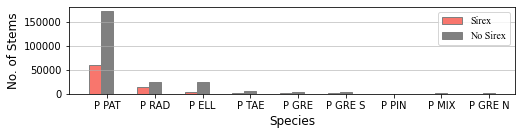

In [9]:
barWidth = 0.25
fig = plt.subplots(figsize =(8, 1.6))
plt.rcParams["font.family"] = "Times New Roman"
# set height of bar
speciesS = SirexCondition[SirexCondition['Sirex_Presence'] =='Sirex']
speciesNS = SirexCondition[SirexCondition['Sirex_Presence'] =='No Sirex']

speciesS = speciesS.groupby(['Species']).sum()
speciesS = speciesS.sort_values(['Stems'], ascending = False)
speciesNS = speciesNS.groupby(['Species']).sum()
speciesNS = speciesNS.sort_values(['Stems'], ascending = False)

S = speciesS['Stems']
NS = speciesNS['Stems']

SNS = pd.concat([S,NS], axis=1).reindex(S.index)
SNS.columns = ['Sirex', 'No Sirex']

# Set position of bar on X axis
br1 = np.arange(len(S))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, SNS['Sirex'], color ='#f8766d', width = barWidth,edgecolor ='grey', label ='Sirex')
plt.bar(br2, SNS['No Sirex'], color ='grey', width = barWidth,edgecolor ='grey', label ='No Sirex') 

plt.xlabel('Species', fontsize = 12)
plt.ylabel('No. of Stems', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(S))],SNS.index)
plt.grid(axis='y', alpha=0.75)
 
plt.legend()
# plt.savefig(f'{FIGURE_PATH}SirexStemsPerSpecies.png')


## 1.3 Leptocybe inspection samples

In [10]:
leptoData = read_from_drive('https://drive.google.com/file/d/159PqHZQeiMbybwg6kf-ltgmR5TbuzxPy/view?usp=sharing')
leptoData.head()

,Year,Species,Lepto_Presence,DataCleaning,% Infestation
0,2017,EGRA,Leptocybe,Trees_assessed_Intensity,72.0
1,2017,EGXC,Leptocybe,Trees_assessed_Intensity,92.0
2,2017,EGXU,Leptocybe,Trees_assessed_Intensity,98.0
3,2017,EGRA,Leptocybe,Trees_assessed_Intensity,100.0
4,2017,EGXU,Leptocybe,Climate_Zone,100.0


In [11]:
leptoPerYear = leptoData.groupby(['Year']).size()
print('Leptocybe per year')
print(leptoPerYear)

print("Average count for Leptocybe and No Leptocybe per Year:",sum(leptoPerYear)/len(leptoPerYear))
print("Total count for Leptocybe and No Leptocybe:",len(leptoData))
print("Min Leptocybe:", min(leptoPerYear))
print("Max Leptocybe:", max(leptoPerYear))


Leptocybe per year
Year
2016     72
2017     46
2018    134
2019    187
2020    126
2021    182
dtype: int64
Average count for Leptocybe and No Leptocybe per Year: 124.5
Total count for Leptocybe and No Leptocybe: 747
Min Leptocybe: 46
Max Leptocybe: 187


In [12]:
leptoPresence = leptoData[leptoData['Lepto_Presence'] == 'Leptocybe']


leptoPerYearPresence = leptoPresence.groupby(['Year']).size()
leptoComp = leptoPerYearPresence/leptoPerYear*100
print("Average for Leptocybe positive per Year:",str(round(sum(leptoComp)/len(leptoComp),0)) + '%')

Average for Leptocybe positive per Year: 40.0%


In [13]:
leptoData.groupby(['DataCleaning']).size()

DataCleaning
Climate_Zone                351
Latitude                      1
Plantation name              23
Trees_assessed_Intensity    213
dtype: int64

### 1.3.1 GPS inspection location and pest presence
#### Figure 7: Leptocybe inspection distribution

Feed data into QGIS and plot spatially using the province shapefile as base layer.

The QGIS project file (used to generate the maps in the report) has not been uploaded to GitHub due to the joint requirement of the pest data's GPS coordinates to be uploaded. This data is confidential and has been requested by the industry partner to be kept as such.

### 1.3.2 Leptocybe intensity
#### Figure 8: Leptocybe intensity vs total rainfall

In [14]:
leptoIntensity = leptoData.groupby(['Year']).mean()
leptoIntensity

,% Infestation
Year,
2016,5.509259
2017,41.782609
2018,15.054726
2019,30.406417
2020,21.514991
2021,17.102612


In [15]:
rainfallLast10Years = read_from_drive('https://drive.google.com/file/d/1YAmptC4Mc1Ck1nbU9ebXl4563H1m3axt/view?usp=sharing')
rainfallLast10Years.head()

,avg_station_rainfall,date
0,135.026796,2000-01-01
1,156.509181,2000-02-01
2,129.175189,2000-03-01
3,52.004579,2000-04-01
4,41.089435,2000-05-01


In [16]:

rainfallLast10Years.index = pd.to_datetime(rainfallLast10Years['date'])
rainfallLast10YearsGrouped = rainfallLast10Years.groupby(by=[rainfallLast10Years.index.year]).sum()
rainfallLast10YearsFrom2015 = rainfallLast10YearsGrouped[rainfallLast10YearsGrouped.index >2014]
rainfallLast10YearsFrom2015

,avg_station_rainfall
date,
2015,339.753572
2016,670.286116
2017,409.702168
2018,257.437587
2019,403.132151


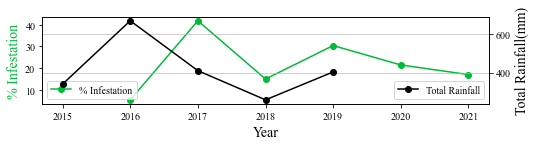

In [17]:
fig,ax = plt.subplots(figsize =(8, 1.6))

line1 = ax.plot(leptoIntensity.index, leptoIntensity, color="#00bb38", marker="o", label = '% Infestation')
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("% Infestation",color="#00bb38",fontsize=14)
ax.legend(loc='lower left')

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
line2 = ax2.plot(rainfallLast10YearsFrom2015.index, rainfallLast10YearsFrom2015,color="black",marker="o",label='Total Rainfall')
ax2.set_ylabel("Total Rainfall(mm)",color="black",fontsize=14)
plt.grid(axis='y', alpha=0.75)
ax2.legend(loc='lower right')
plt.show()

### 1.3.3 Tree species and Leptocybe prevalence
#### Figure 9: Leptocybe prevalence per tree species

In [18]:
leptoSpecies = read_from_drive('https://drive.google.com/file/d/1ewSTBLkiZWW0xoC6TXrNKXP4aYq-_w-S/view?usp=sharing')
leptoSpecies.head()

,Species,Trees_Leptocybe,Trees_NoLeptocybe
0,EGRA,36,14
1,EGXC,46,4
2,EGXU,49,1
3,EGRA,50,0
4,EGXU,50,0


In [19]:
speciesGrouped = leptoSpecies.groupby(['Species']).sum()
speciesGrouped = speciesGrouped.sort_values(['Trees_Leptocybe'], ascending = False)
speciesGrouped

,Trees_Leptocybe,Trees_NoLeptocybe
Species,,
EGXN,3394,5579
EGRA,2320,3835
EGXU,389,6127
EDUN,110,6181
EGXC,53,77
EUXG,50,10
ENIT,43,907
ESAL,37,213
ESMI,27,956


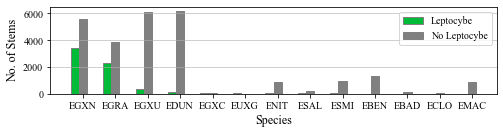

In [20]:
barWidth = 0.25
fig = plt.subplots(figsize =(8, 1.6))
plt.rcParams["font.family"] = "Times New Roman"

# Set position of bar on X axis
br1 = np.arange(len(speciesGrouped))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, speciesGrouped['Trees_Leptocybe'], color ='#00bb38', width = barWidth,edgecolor ='grey', label ='Leptocybe')
plt.bar(br2, speciesGrouped['Trees_NoLeptocybe'], color ='grey', width = barWidth,edgecolor ='grey', label ='No Leptocybe') 

plt.xlabel('Species', fontsize = 12)
plt.ylabel('No. of Stems', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(speciesGrouped))],speciesGrouped.index)
plt.grid(axis='y', alpha=0.75)
 
plt.legend()
# plt.savefig(f'{FIGURE_PATH}SirexStemsPerSpecies.png')

# 2. DISCUSSION

#### Figure 10: Weather Station Distribution vs. Pest Distribution

Feed data into QGIS and plot spatially using the province shapefile as base layer.

The QGIS project file (used to generate the maps in the report) has not been uploaded to GitHub due to the joint requirement of the pest data's GPS coordinates to be uploaded. This data is confidential and has been requested by the industry partner to be kept as such.

#### Figure 11: Weather Station Distribution vs. Pest Distribution

In [21]:
distance = read_from_drive('https://drive.google.com/file/d/1OcthOhvr-SLYIX8M6w-irMOjFkK_WUGu/view?usp=sharing')
distance.head()

,Id,StationId,Distance,Pest
0,1,1067,2674.477709,Leptocybe
1,2,5178,1637.429214,Leptocybe
2,3,5606,1690.019513,Leptocybe
3,4,5173,1270.956844,Leptocybe
4,5,5190,1658.605062,Leptocybe


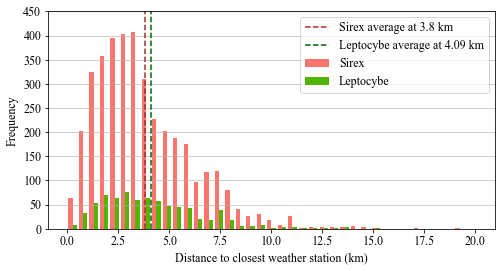

In [22]:
distanceS = distance[distance['Pest'] =='Sirex']
distanceL = distance[distance['Pest'] =='Leptocybe']

ds = distanceS['Distance'] /1000
dl = distanceL['Distance'] /1000
bins = np.linspace(0, 20, 40)

averageS = sum(ds)/len(ds)
averageL = sum(dl)/len(dl)

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams.update({'font.size': 12})
sline = plt.axvline(x=averageS,color='brown', linestyle='--', label = 'Sirex average at ' + str(round(averageS,2)) + ' km')
lline = plt.axvline(x=averageL,color='darkgreen', linestyle='--',label = 'Leptocybe average at ' + str(round(averageL,2)) + ' km')
plt.legend(handles = [sline,lline])

plt.hist([ds, dl], bins, label=['Sirex', 'Leptocybe'], color=['#f8766d','#54b402'])

plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Distance to closest weather station (km)')
plt.ylabel('Frequency')
plt.ylim(ymax=450)
plt.show()


# plt.savefig(f'{FIGURE_PATH}distance.png')


#### Figure 12: Voronoi Diagram

Feed data into QGIS and plot spatially using weather stations, and pest datasets. Use QGIS function to generate Voronoi Diagrams.

The QGIS project file (used to generate the maps in the report) has not been uploaded to GitHub due to the joint requirement of the pest data's GPS coordinates to be uploaded. This data is confidential and has been requested by the industry partner to be kept as such.